In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from skimage import io
from skimage.feature import greycomatrix, greycoprops
import cv2

In [ ]:
image = io.imread('/content/nev00001.jpg')


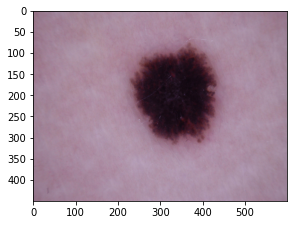

In [ ]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(image, cmap='gray')

In [ ]:
img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [ ]:
#GLCM feature extraction

image_feature = pd.DataFrame()
distance = [1, 3, 5, 8]
angle = [0, np.pi/4, np.pi/2, 3*np.pi/4]
df = pd.DataFrame()
count = 1
for dist in distance:
  for ang in angle:  
    GLCM = greycomatrix(img, [dist], [ang])      
    GLCM_Energy = greycoprops(GLCM, 'energy')[0]
    df[f'Energy{count}'] = GLCM_Energy
    GLCM_corr = greycoprops(GLCM, 'correlation')[0]
    df[f'Corr{count}'] = GLCM_corr 
    GLCM_hom = greycoprops(GLCM, 'homogeneity')[0]
    df[f'Homogen{count}'] = GLCM_hom       
    GLCM_contr = greycoprops(GLCM, 'contrast')[0]
    df[f'Contrast{count}'] = GLCM_contr
    count = count + 1
image_feature = image_feature.append(df)    
image_feature


,Energy1,Corr1,Homogen1,Contrast1,Energy2,Corr2,Homogen2,Contrast2,Energy3,Corr3,...,Homogen14,Contrast14,Energy15,Corr15,Homogen15,Contrast15,Energy16,Corr16,Homogen16,Contrast16
0,0.065949,0.998413,0.469096,4.970974,0.062858,0.997891,0.436433,6.617964,0.067415,0.998589,...,0.244102,52.388096,0.045256,0.984365,0.254013,49.62621,0.044424,0.980942,0.240318,60.839715


In [ ]:
print(GLCM_Energy)

[0.04442392]


In [ ]:
# Train Features
train_features = image_feature